# Serie 03
## Aufgabe 3.1
Der Geysir Old Faithful im Yellowstone National Park ist eine der bekanntesten heissen Quellen. Für die Zuschauer und den Nationalparkdienst ist die Zeitspanne zwischen zwei Ausbrüchen und die Eruptionsdauer von grossem Interesse. Messungen sind in der Datei `geysir.dat` vom 1.8.1978 - 8.8.1978 in 3 Spalten abgelegt: `Tag`, `Zeitspanne` und `Eruptionsdauer`.

a) Zeichnen Sie Histogramme von der Zeitspanne zwischen zwei Ausbrüchen:

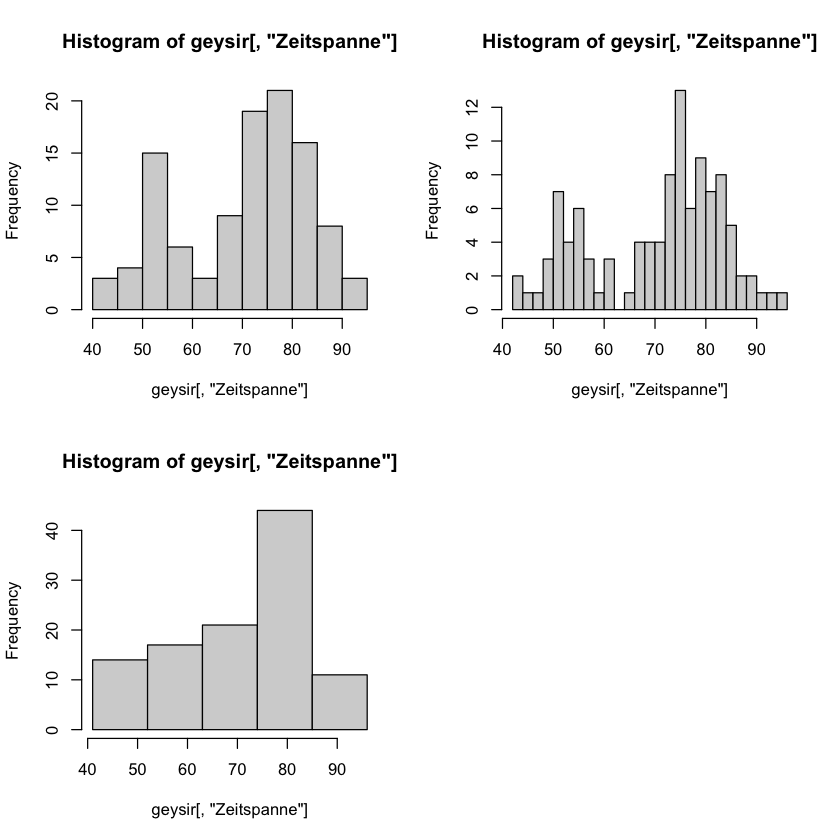

In [12]:
# Datensatz einlesen
geysir <- read.table("geysir.dat", header = TRUE) 
# 4 Graphiken im Graphikfenster
par(mfrow = c(2,2))
hist(geysir[, "Zeitspanne"])
hist(geysir[, "Zeitspanne"], breaks = 20) # breaks dient nur als Vorschlag, wird evtl. intern angepasst.
hist(geysir[, "Zeitspanne"], breaks = seq(41, 96, by = 11))

Was fällt auf? Was ist der Unterschied zwischen den drei Histogrammen?

* bei der dritten bleibt *bimodales* Verhalten verborgen, weil die Anzahl Klassen zu grob gewählt wurde
* es handelt sich um nicht normierte Histogramme, ein Vergleich ist schwierig

b) Zeichnen Sie Histogramme (Anzahl Klassen variieren) von der Eruptionsdauer:
Was fällt auf? Vergleichen Sie mit der ersten Teilaufgabe.

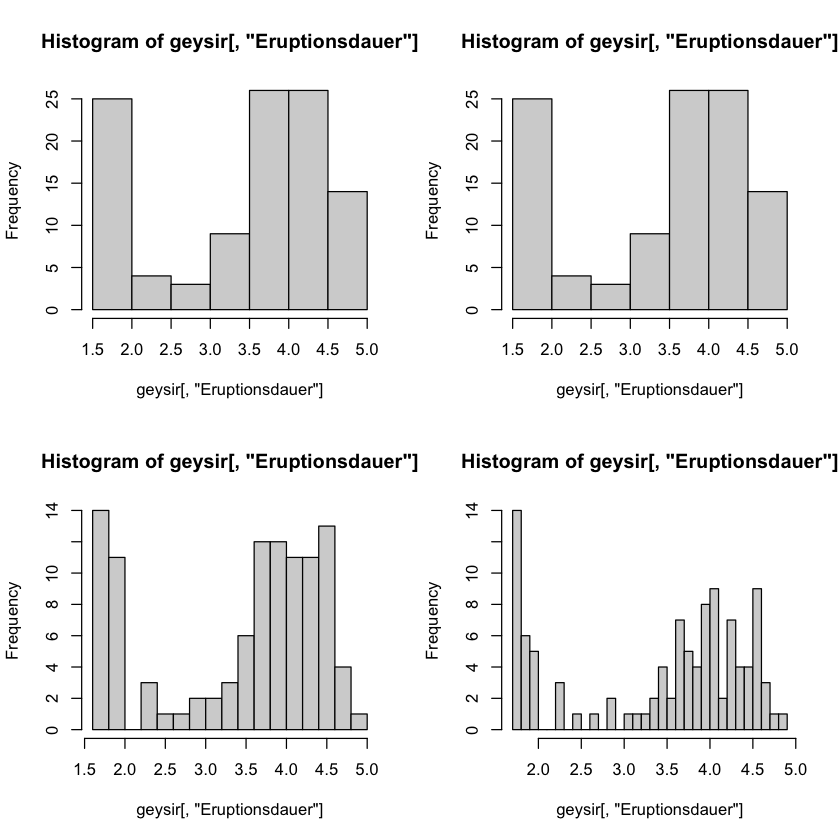

In [13]:
par(mfrow = c(2,2))
hist(geysir[, "Eruptionsdauer"])
hist(geysir[, "Eruptionsdauer"], breaks = 10)
hist(geysir[, "Eruptionsdauer"], breaks = 20) # breaks dient nur als Vorschlag, wird evtl. intern angepasst.
hist(geysir[, "Eruptionsdauer"], breaks = 30)

* Die Histogramme behalten ihr bimodales Verhalten
* Das Histogramm zeigt die Häufigkeiten der Dauer, entweder ist der Ausbruch sofort vobei oder dauert min. 3.5 Zeiteinheiten
* Die ersten beiden haben durch "breitere" Klassen mehr Punkt in einer Klasse

## Aufgabe 3.2
In Aufgabe 2.4 hatten wir den Alterunterschied zwischen Ehemännern und Ehefrauen untersucht.
Nun wollen wir nun untersuchen, ob grosse Frauen auch grosse Männer heiraten.
a) Lesen Sie die Datei `mannfrau_s03.csv` ein

In [14]:
mannfrau <- read.table("mannfrau_s03.csv", header=TRUE, sep=";", dec=",")
head(mannfrau)

,alter.mann,groesse.mann,alter.frau,groesse.frau
,<int>,<dbl>,<int>,<dbl>
1,49,180.9,43,159
2,25,184.1,28,156
3,40,165.9,30,162
4,52,177.9,57,154
5,58,161.6,52,142
6,32,169.5,27,166


b) Erzeugen Sie das Streudiagramm aus groesse.mann und groesse.frau mit der Regressionsgerade.
Interpretieren Sie das Streudiagramm

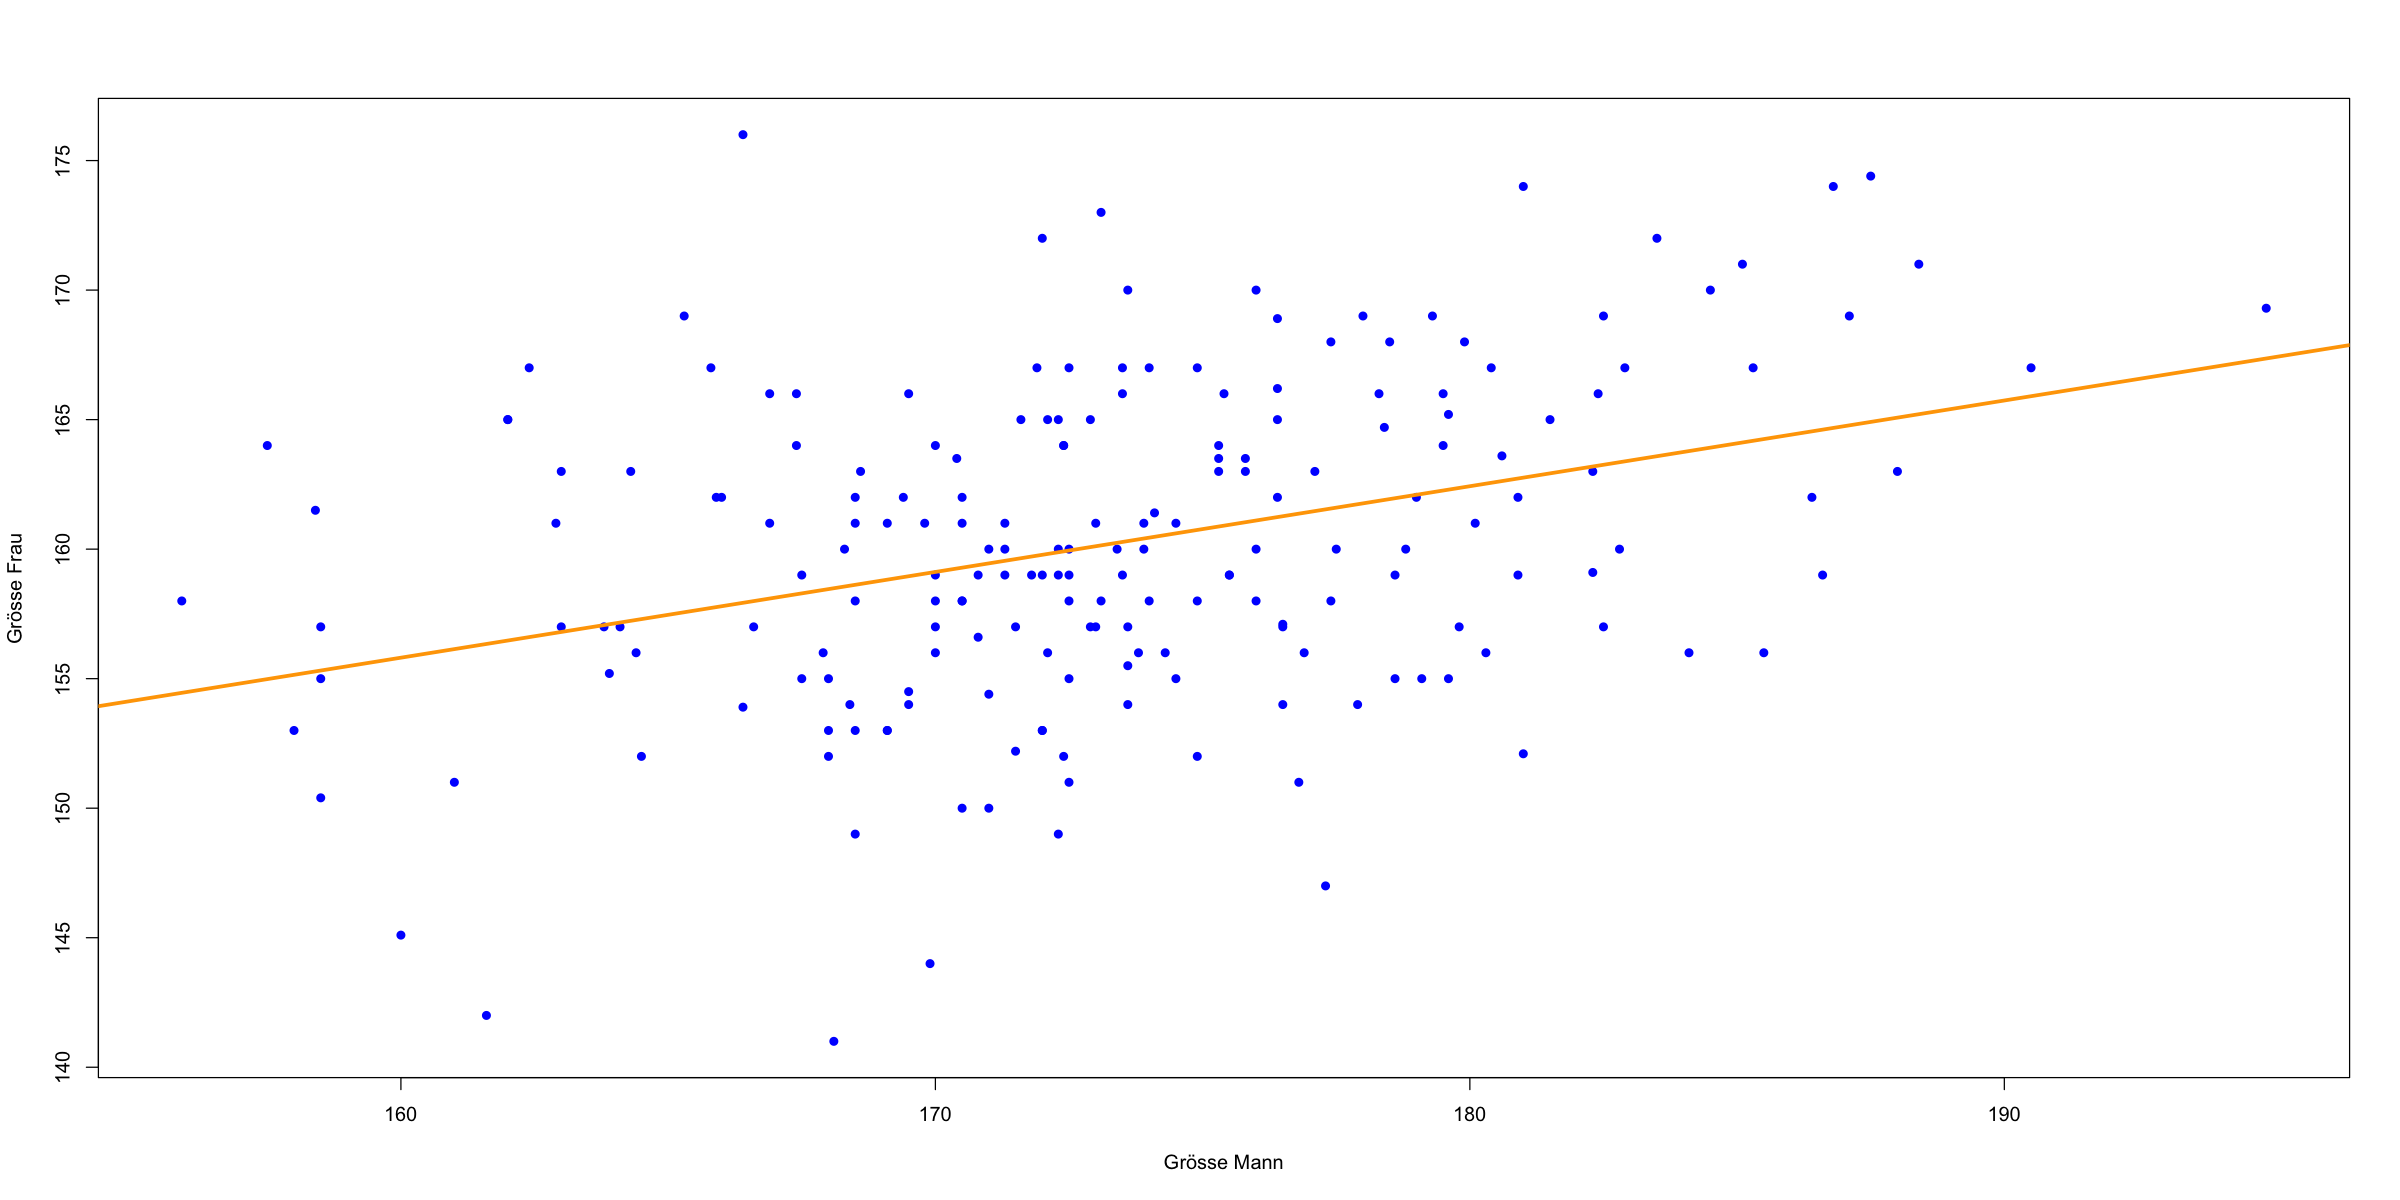

In [23]:
plot(mannfrau$groesse.mann, mannfrau$groesse.frau,
    xlab="Grösse Mann",
    ylab="Grösse Frau",
    pch=16,
    col="blue"
)
abline(lm(mannfrau$groesse.frau ~ mannfrau$groesse.mann), lwd=3, col = "orange")

* es scheint als wären die meisten Männer grösser als ihre Frauen
* die Grösse der Männer steigt steiler an, als die Grösse der Frauen
* es gibt wenige Ausreisser
* kleiner Männer heiraten eher kleinere Frauen und grössere Männer eher grössere Frauen

c) Bestimmen Sie die Koeffizienten der Regressionsgeraden $y=a+bx$ und interpretieren Sie diese Werte.


In [16]:
lm(mannfrau$groesse.frau ~ mannfrau$groesse.mann)


Call:
lm(formula = mannfrau$groesse.frau ~ mannfrau$groesse.mann)

Coefficients:
          (Intercept)  mannfrau$groesse.mann  
              102.857                  0.331  


$a = 102.857$  
   - Wäre der Mann 0cm gross, so wäre die Frau 102cm gross   

$b = 0.331$
   - für jeden Zentimeter Körpergrösse des Mannes, ist die Frau 0.3 cm grösser

d) Im Streudiagramm in der Abbildung unten ist die Gerade y=x,also groesse.mann gleich groesse.frau orange eingezeichnet.  
<img src="series_03_streudiagramm.png" width="50%">

Wie interpretieren Sie diese Gerade im Streudiagramm?

* bei den Punkte über der Geraden sind die Frauen grösser als der Mann
* bei den wenigsten Paaren sind die Partner gleich gross
* bei der Mehrheit aller Paare ist der Mann grösser

## Aufgabe 3.3
Wir betrachten eine Studie, die 1979 in den Vereinigten Staaten durchgeführt wurde (National Longitudinal Study of Youth, NLSY79): von 2584 Amerikanern im Jahr 1981 wurde der Intelligenzquotient (gemäss AFQT - armed forces qualifying test score) gemessen; 2006 wurden dieselben Personen nach ihrem jährlichen Einkommen im Jahr 2005 und der Anzahl Jahre Schulbildung befragt. Uns interessiert hier natürlich, ob ein hoher IQ oder eine lange Schulbildung zu einem höheren Einkommen führen. In der Datei `income.dat` finden Sie den Datensatz mit dem Einkommen, der Anzahl Jahre abgeschlossener Schulbildung und den ermittelten Intelligenzquotienten von 2584 Amerikanern.  
a) Lesen Sie den Datensatz `income.dat` ein und generieren Sie Streudiagramme, in welchen das Einkommen versus Anzahl Jahre Schulbildung und Einkommen versus Intelligenzquotient aufgetragen sind.

,AFQT,Educ,Income2005
,<dbl>,<int>,<int>
1,6.841,12,5500
2,99.393,16,65000
3,47.412,12,19000
4,44.022,14,36000
5,59.683,14,65000
6,72.313,16,8000


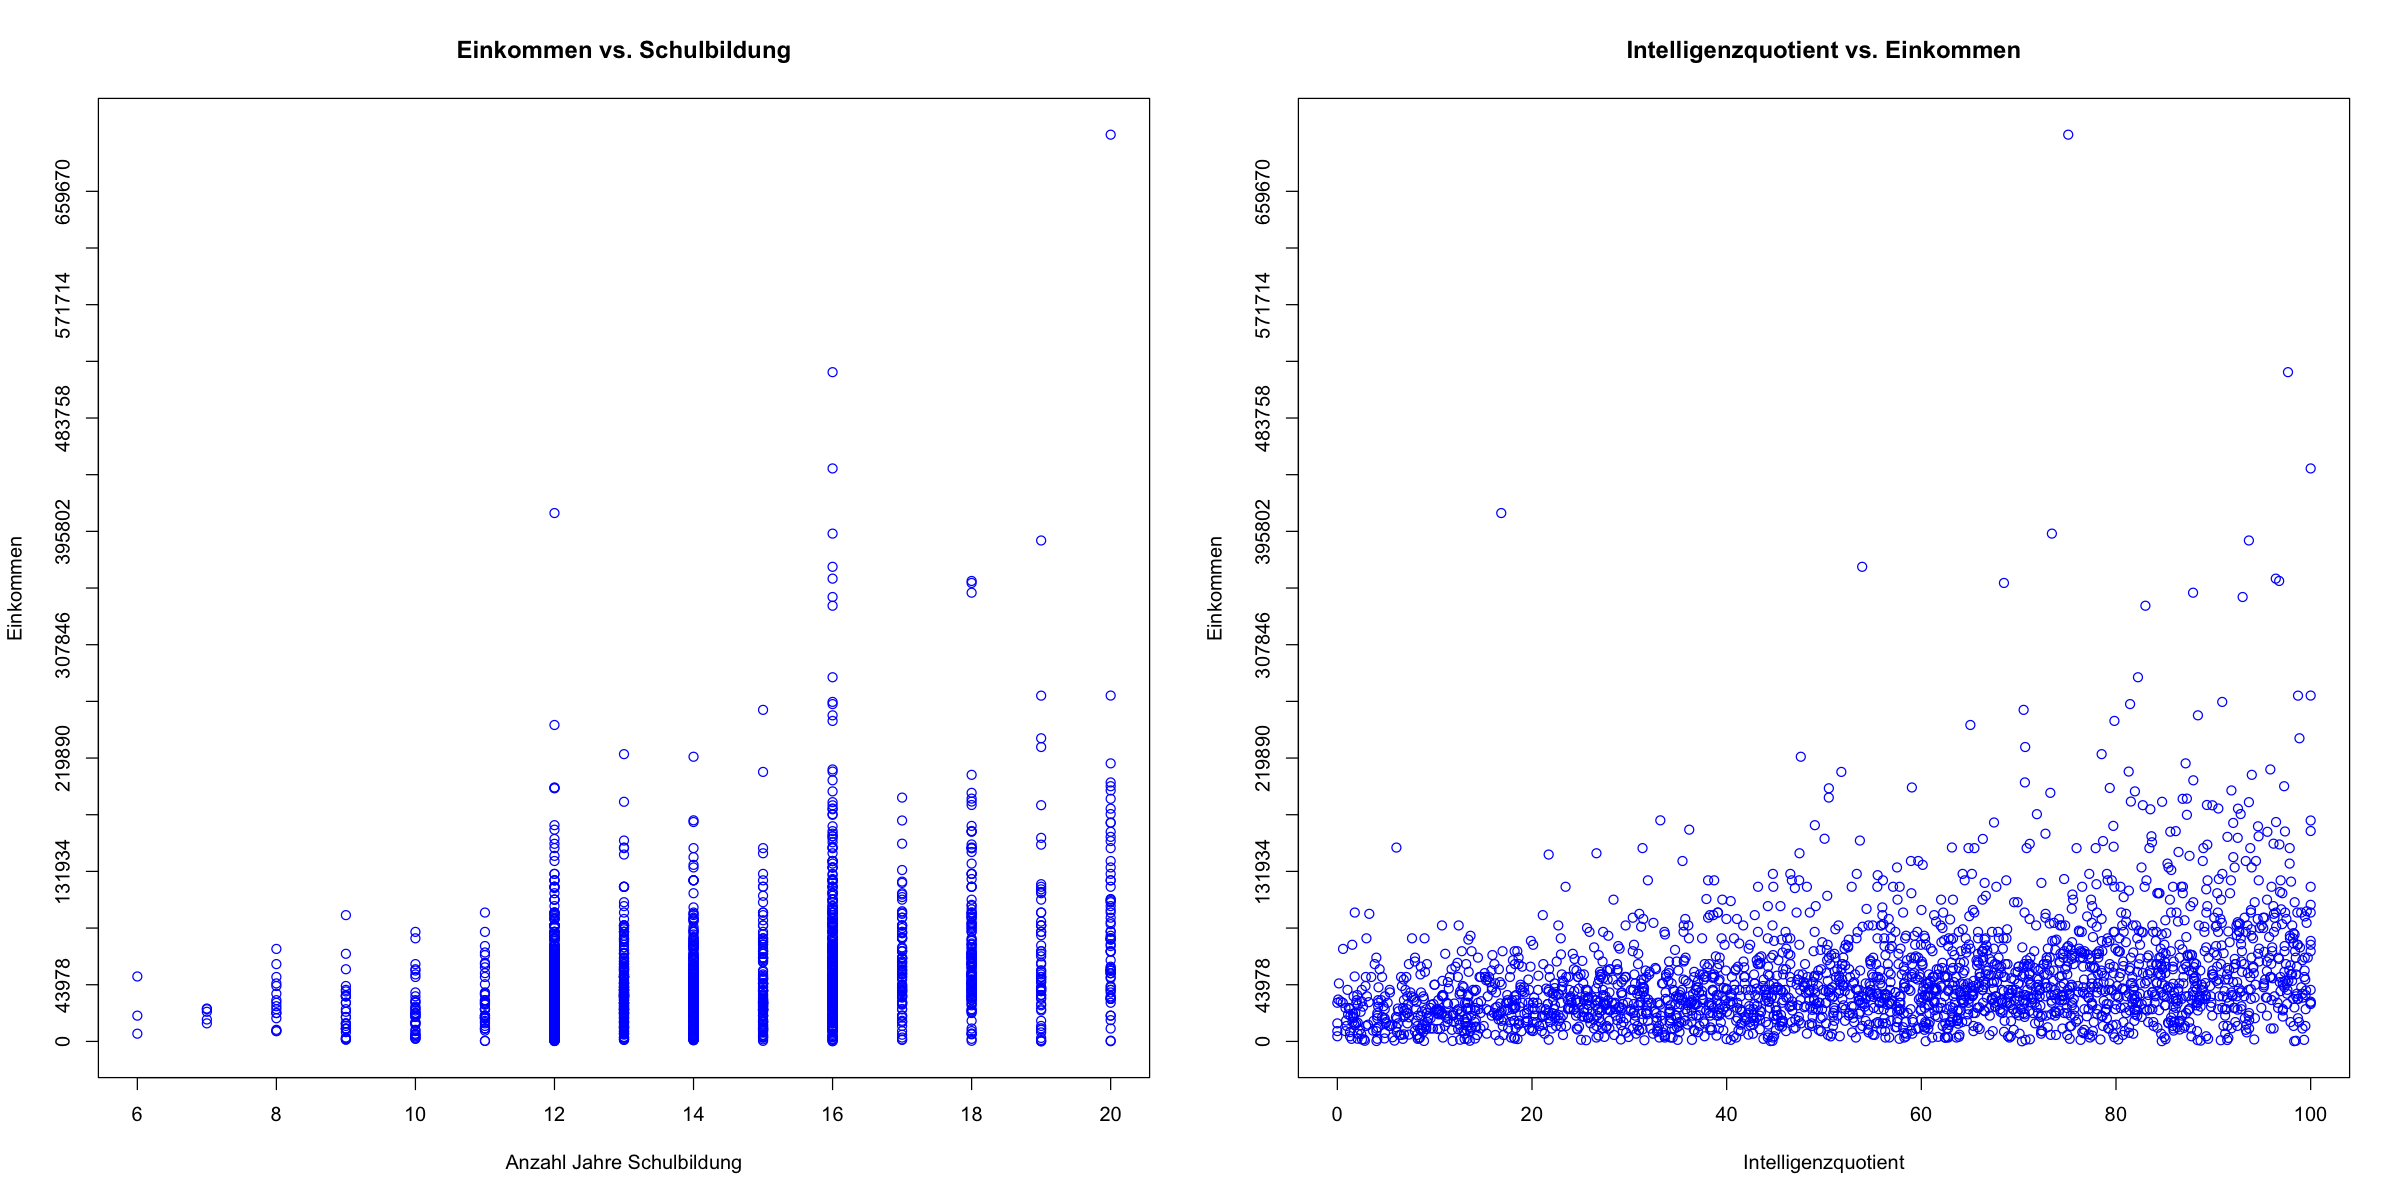

In [17]:
data <- read.table(file="income.dat", sep=" ", header=TRUE)
head(data)
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)
maxIncome <- max(data$Income2005)
ypos <- seq(0,maxIncome,ceiling(maxIncome/16))
plot(data$Educ, data$Income2005,
    xlab="Anzahl Jahre Schulbildung",
    ylab="Einkommen",
    main="Einkommen vs. Schulbildung",
    col ="blue",
     yaxt="n"
    )
axis(2, ypos)
plot(data$AFQT, data$Income2005,
    xlab="Intelligenzquotient",
    ylab="Einkommen",
    main="Intelligenzquotient vs. Einkommen",
    col ="blue",
     yaxt="n"
    )
axis(2, ypos)

b) Bestimmen Sie die Parameter a und b des linearen Modells $y = a + bx$, wobei $y$ das Einkommen bezeichnet und $x$ die Anzahl Jahre Schulbildung. Zeichnen Sie die Regressionsgerade mit der R-Funktion `plot(...,..., type="l") `
  
Wie interpretieren Sie die Parameter a und b?


Call:
lm(formula = data$Income2005 ~ data$Educ)

Coefficients:
(Intercept)    data$Educ  
     -40200         6451  


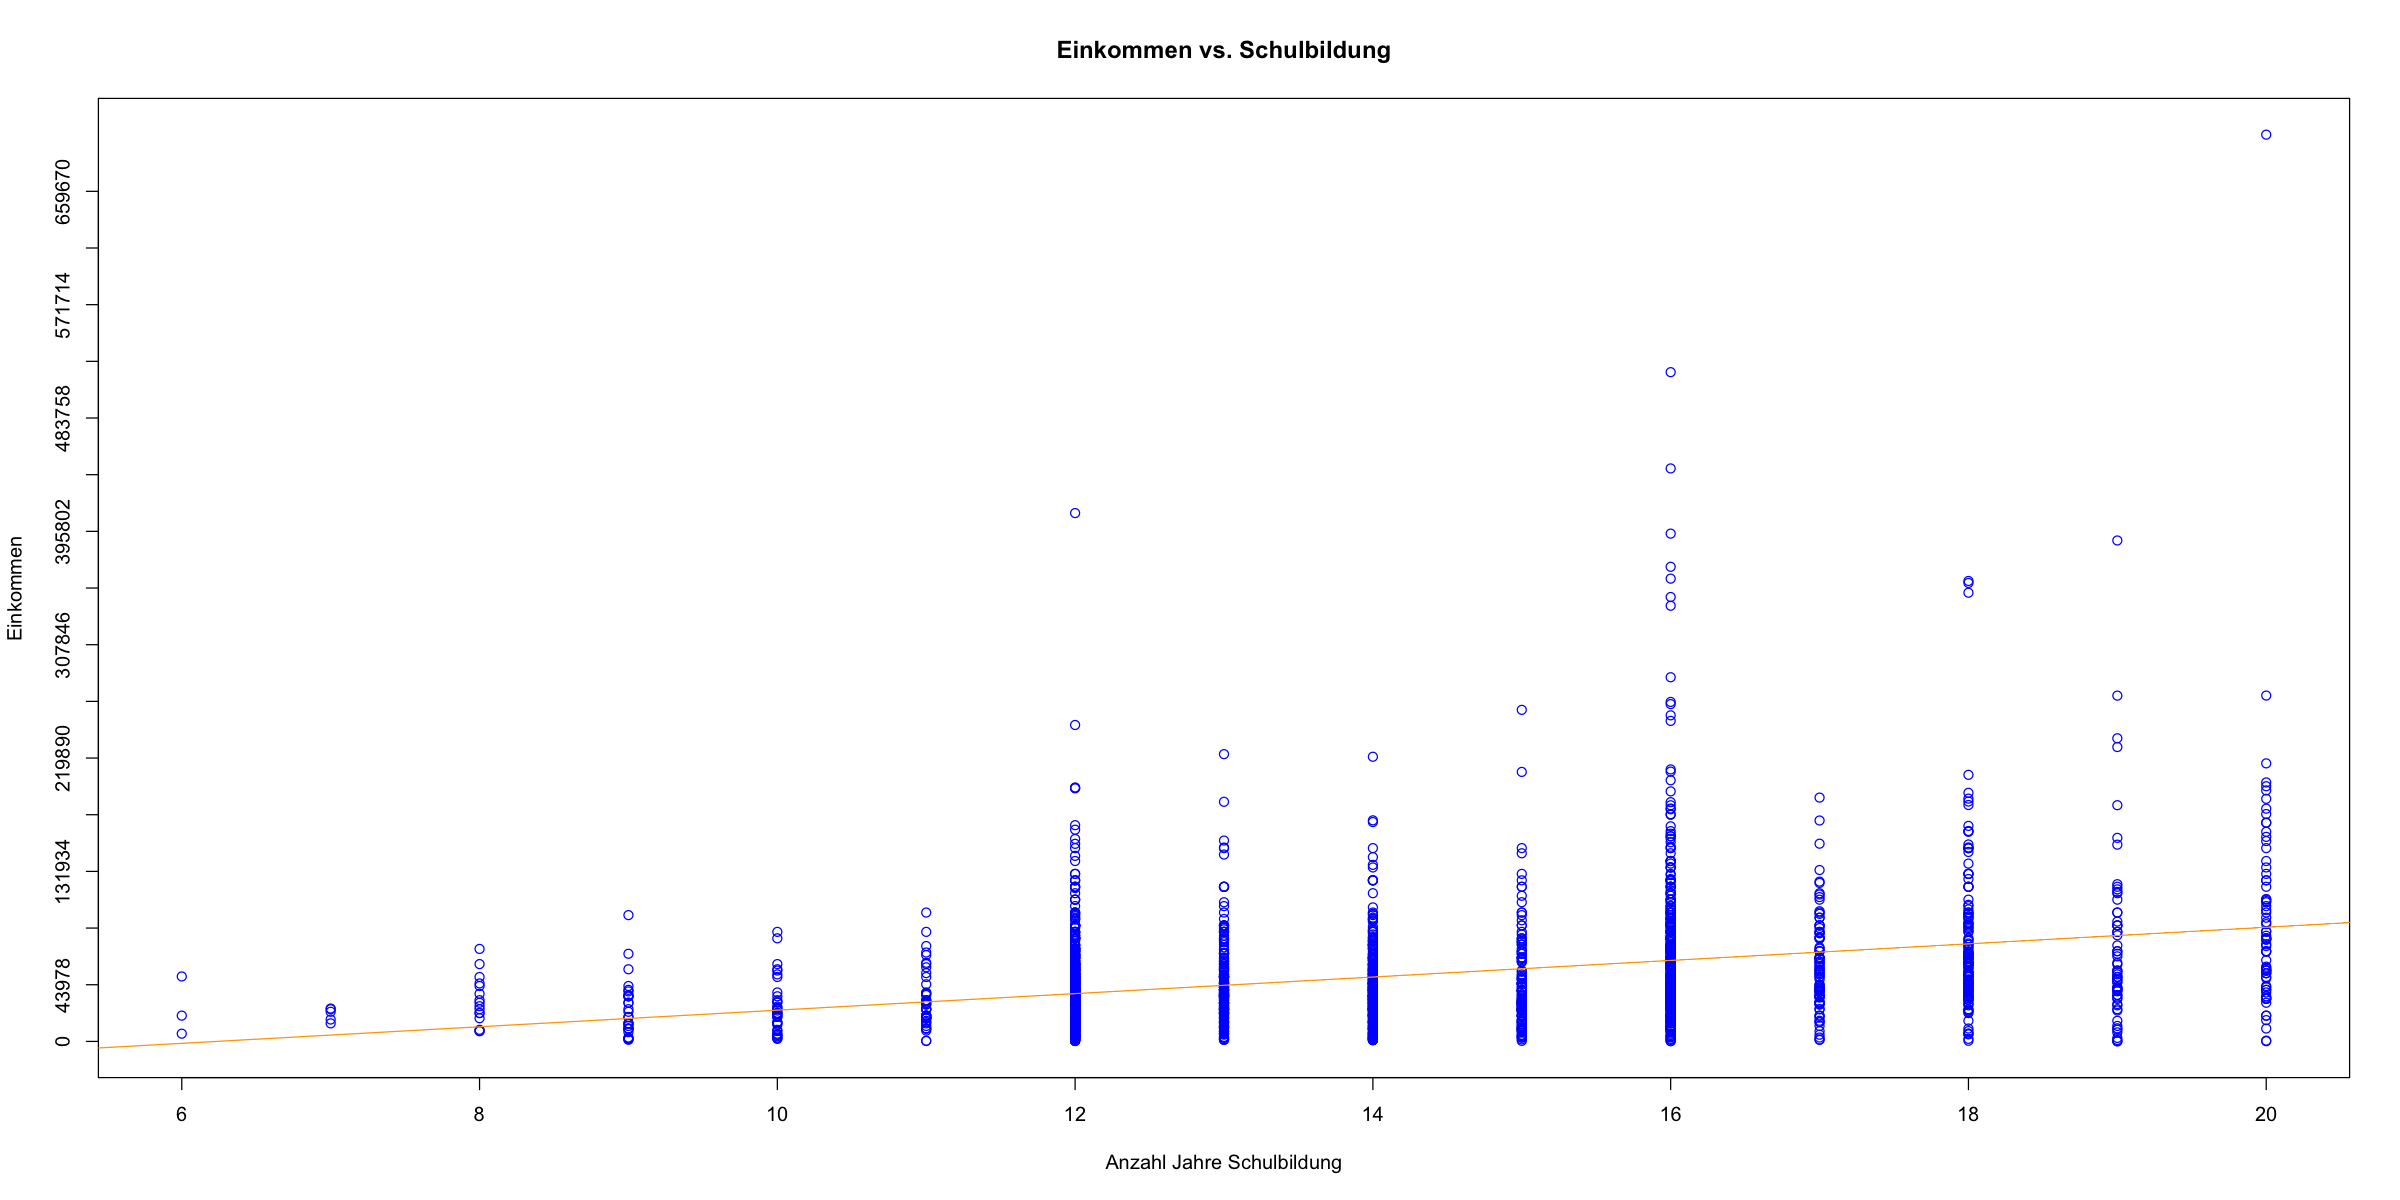

In [18]:
lm(data$Income2005 ~ data$Educ)
plot(data$Educ, data$Income2005,
    xlab="Anzahl Jahre Schulbildung",
    ylab="Einkommen",
    main="Einkommen vs. Schulbildung",
    col ="blue",
     yaxt="n"
    )
abline(lm(data$Income2005 ~ data$Educ), col="orange")
axis(2, ypos)

a) $a = -40200$
   - man muss über sechs Jahre Schulbildung absolvieren, damit man überhaupt etwas erwirtschaftet
   - a ist die Verschiebung der $y$-Achse  

b) $b = 6451$
   - b entspricht der Steigung des Einkommens nach Anzahl Jahre Schulbildung
   - b die Steigung ist positiv, Einkommen steigt, mit steigender Anzahl Jahre von der Schulbildung

## Aufgabe 3.4
In dieser Aufgabe betrachten wir 4 Datensätze, die von Anscombe konstruiert wurden. In jedem der Datensätze gibt es eine Zielvariable $y$ und eine erklärende Variable $x$. 

a) Die Datei ist `R` schon enthalten.

In [19]:
head(anscombe)

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


b) Stellen Sie jeden der 4 Datensätze als Streudiagramm dar, zeichnen Sie die Regressionsgerade ein und kommentieren Sie die Ergebnisse.

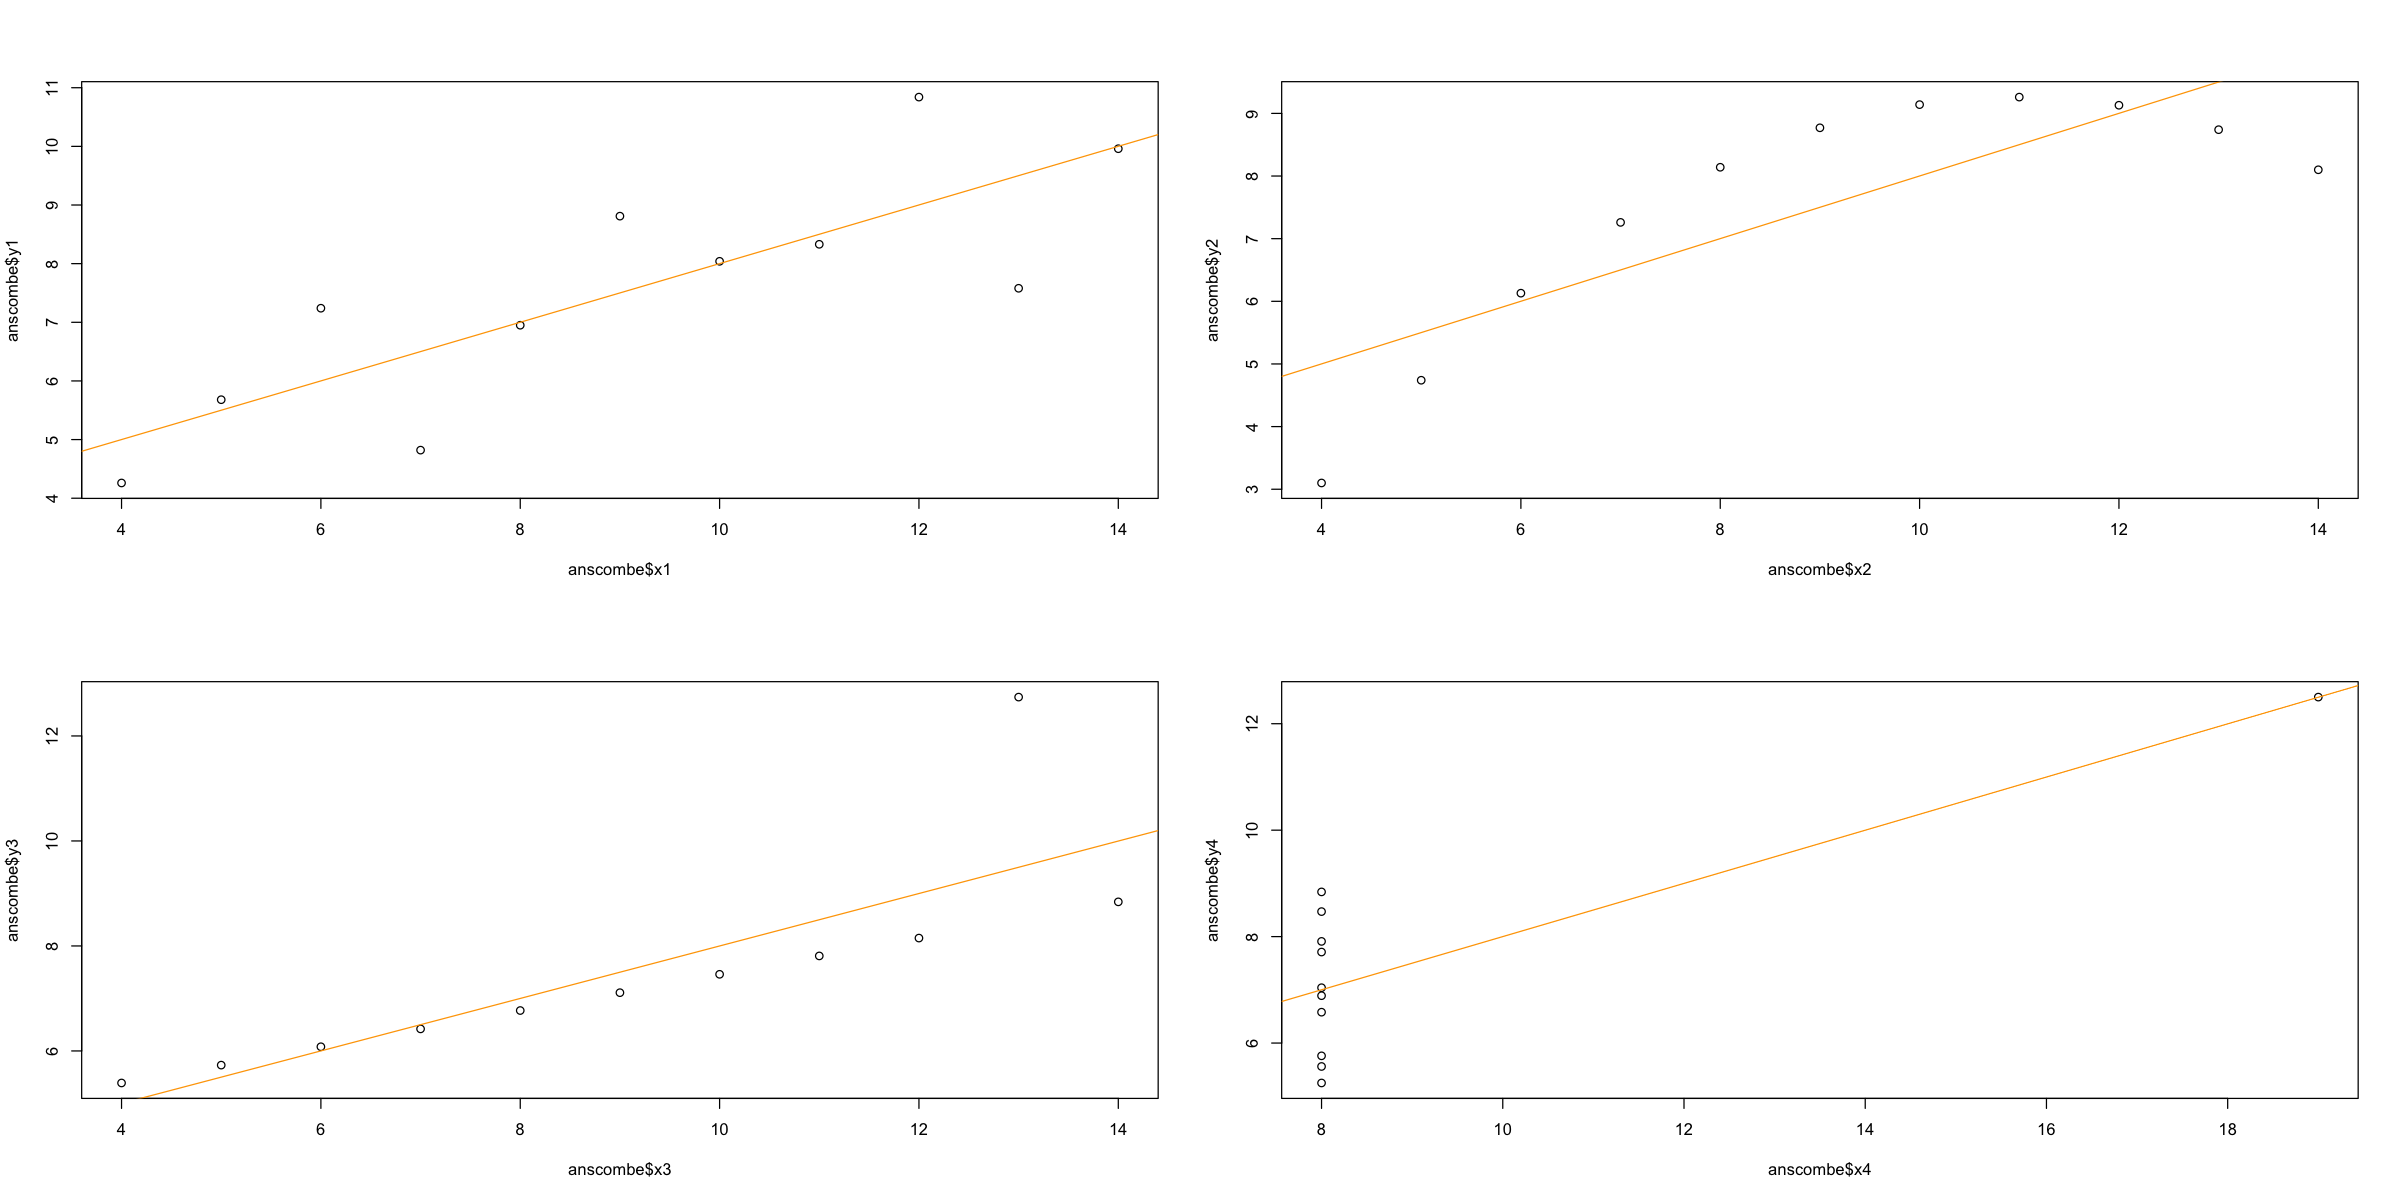

In [20]:
par(mfrow=c(2,2))

plot(anscombe$x1, anscombe$y1)
reg1 <- lm(anscombe$y1 ~ anscombe$x1) 
abline(reg1, col="orange")

plot(anscombe$x2, anscombe$y2)
reg2 <- lm(anscombe$y2 ~ anscombe$x2) 
abline(reg2, col="orange")

plot(anscombe$x3, anscombe$y3)
reg3 <- lm(anscombe$y3 ~ anscombe$x3) 
abline(reg3, col="orange")

plot(anscombe$x4, anscombe$y4)
reg4 <- lm(anscombe$y4 ~ anscombe$x4) 
abline(reg4, col="orange")

In [21]:
cor(anscombe$x1, anscombe$y1)
cor(anscombe$x2, anscombe$y2)
cor(anscombe$x3, anscombe$y3)
cor(anscombe$x4, anscombe$y4)
reg1
reg2
reg3
reg4

[1] 0.8164205

[1] 0.8162365

[1] 0.8162867

[1] 0.8165214


Call:
lm(formula = anscombe$y1 ~ anscombe$x1)

Coefficients:
(Intercept)  anscombe$x1  
     3.0001       0.5001  



Call:
lm(formula = anscombe$y2 ~ anscombe$x2)

Coefficients:
(Intercept)  anscombe$x2  
      3.001        0.500  



Call:
lm(formula = anscombe$y3 ~ anscombe$x3)

Coefficients:
(Intercept)  anscombe$x3  
     3.0025       0.4997  



Call:
lm(formula = anscombe$y4 ~ anscombe$x4)

Coefficients:
(Intercept)  anscombe$x4  
     3.0017       0.4999  


* Die Streudiagramm haben sehr unterschiedliche Datensätze, aber sehr ähnliche Korrelationskoeffiziente und Regressionsgeraden

c) Vergleichen Sie jeweils $a$ und $b$, wobei $y = a + bx$.

In [22]:
lm(y1 ~ x1, data = anscombe) # oder
lm(anscombe$y1 ~ anscombe$x1)


Call:
lm(formula = y1 ~ x1, data = anscombe)

Coefficients:
(Intercept)           x1  
     3.0001       0.5001  



Call:
lm(formula = anscombe$y1 ~ anscombe$x1)

Coefficients:
(Intercept)  anscombe$x1  
     3.0001       0.5001  


* a und b jeweils sehr ähnlich (Daten siehe b))